In [6]:
using Healpix
using PowerSpectra
using Random
using Plots

In [124]:
nside = 256
mask = HealpixMap{Float64, RingOrder}(nside)
rand!(mask.pixels)
maskalm = map2alm(mask)

for l = (2nside):maskalm.lmax
    for m = 0:l
        index = almIndex(maskalm, l, m)
        maskalm.alm[index] /= √l
    end
end
mask = alm2map(maskalm, nside);

# plot(mask)

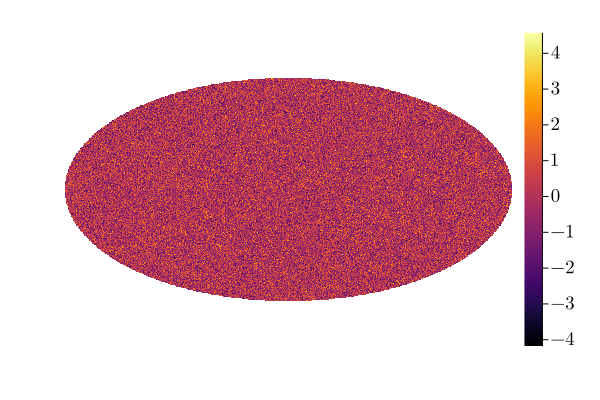

In [125]:
noise = HealpixMap{Float64, RingOrder}(nside)
randn!(noise.pixels)
plot(noise)

In [126]:
𝐌 = mcm(:TT, map2alm(mask), map2alm(mask))

planckmask = PowerSpectra.planck256_mask("143", "hm1", :T)
𝐌2 = mcm(:TT, map2alm(planckmask), map2alm(planckmask));

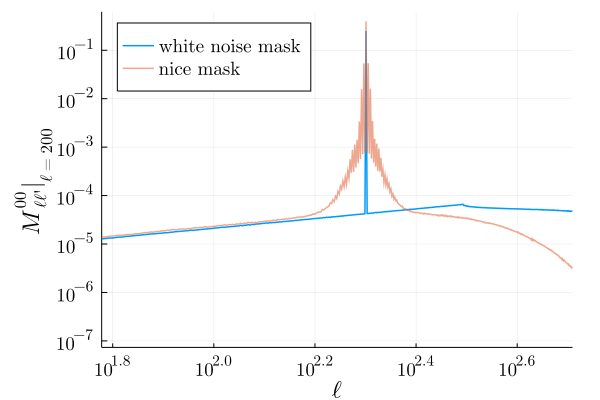

In [127]:
plot(𝐌[200,:], yaxis=:log10, label="white noise mask")
plot!(𝐌2[200,:], xaxis=:log10, yaxis=:log10, xlim=(60,2nside), 
    label="nice mask", legend=:topleft,
    ylabel="\$M^{00}_{\\ell \\ell'} |_{\\ell=200}\$", xlabel="\$\\ell\$", alpha=0.6)

In [128]:
pCl = SpectralVector(alm2cl(map2alm(noise * mask)))
Cl = 𝐌 \ pCl;

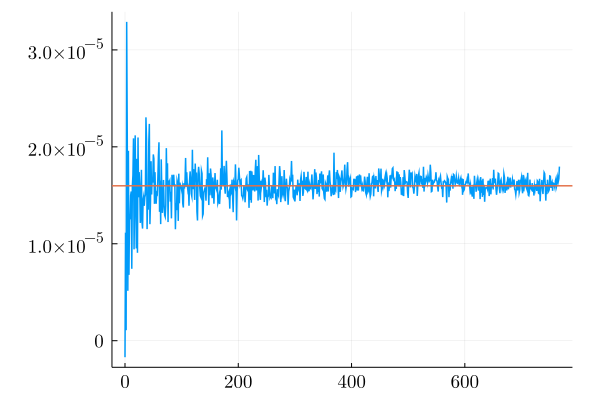

In [129]:
plot(Cl)
pixvar = 1
hline!([pixvar * nside2pixarea(nside)])